In [62]:
import pandas as pd
import numpy as np
dataframe = pd.read_csv('adult-all.csv', header=None)

In [63]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [64]:
dataframe.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

# Renaming Columns

In [65]:
dataframe = dataframe.rename(columns={0: 'age', 
                        1: 'workclass',
                        2:'fnlwgt',
                        3: 'education',
                        4: 'education_num',
                        5: 'marital_status', 
                        6: 'occupation',
                        7: 'relationship',
                        8: 'race',
                        9: 'sex',
                        10: 'capital_gain',
                        11: 'capital_loss',
                        12: 'hours_per_work',
                        13: 'native',
                        14: 'salary'})
# Or rename the existing DataFrame (rather than creating a copy) 
# dataframe.rename(columns={'0': 'age', '1': 'workclass','2':'fnlwgt', '3': 'education', '4': 'education_num',
#                         '5': 'marital_status', '6': 'occupation','7': 'relationship', '8': 'race', '9': 'sex',
#                         '10': 'capital_gain', '11': 'capital_loss', '12': 'hours_per_work',
#                         '13': 'country', '14': 'salary'}, inplace=True)

In [66]:
dataframe.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_work', 'native', 'salary'],
      dtype='object')

## Data cleaning


<AxesSubplot:xlabel='hours_per_work', ylabel='age'>

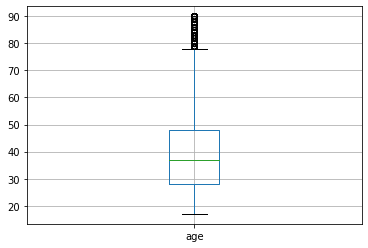

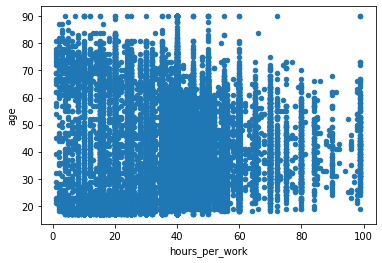

In [67]:

boxplot = dataframe.boxplot(column=['age'])
dataframe.plot.scatter(y='age', x='hours_per_work')

#accepting age as it is because age limit is not crossing 90 which is realistic




In [68]:
dataframe["capital_loss"].describe()

count    48842.000000
mean        87.502314
std        403.004552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital_loss, dtype: float64

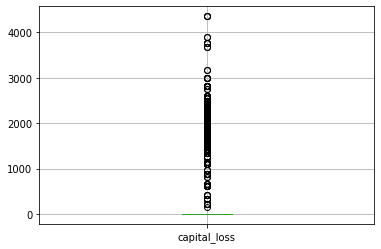

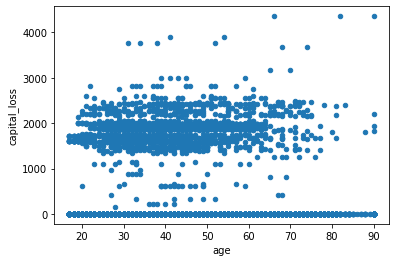

In [69]:
boxplot1 = dataframe.boxplot(column=['capital_loss'])
dataframe.plot.scatter(x='age', y='capital_loss')

#We found outliers where people from all age group have 0 capital loss which will not help us with analysis
#We will replace this outliers with mean.

mean_capital_loss = dataframe.loc[dataframe['capital_loss']>0, 'capital_loss'].mean()
dataframe.loc[dataframe.capital_loss == 0, 'capital_loss'] = np.nan
dataframe.fillna(mean_capital_loss,inplace=True)

In [70]:
dataframe["capital_loss"].describe()

count    48842.000000
mean      1872.825592
std         78.673713
min        155.000000
25%       1872.825592
50%       1872.825592
75%       1872.825592
max       4356.000000
Name: capital_loss, dtype: float64

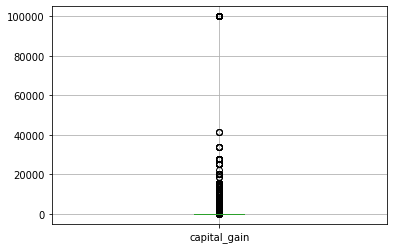

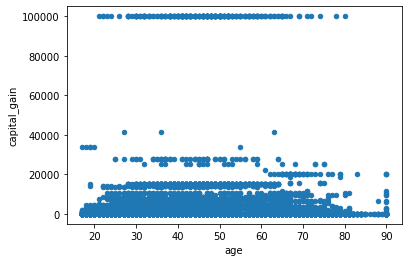

In [71]:
boxplot2 = dataframe.boxplot(column=['capital_gain'])
dataframe.plot.scatter(x='age', y='capital_gain')
#We found outliers where people from all age group have 100000 capital gain which will not help us with analysis
#We will replace this outliers with mean.
mean_capital_gain = dataframe.loc[dataframe['capital_gain']<100000, 'capital_gain'].mean()
dataframe.loc[dataframe.capital_gain > 80000, 'capital_gain'] = np.nan
dataframe.fillna(mean_capital_gain,inplace=True)

<AxesSubplot:xlabel='age', ylabel='hours_per_work'>

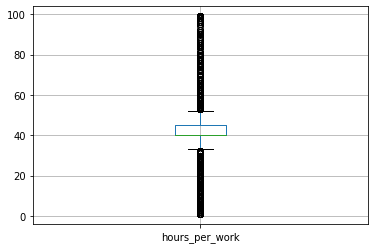

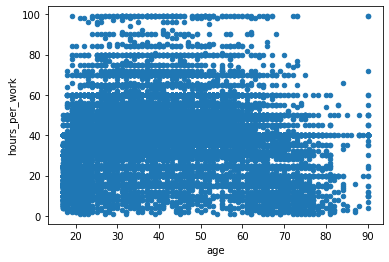

In [72]:
boxplot3 = dataframe.boxplot(column=['hours_per_work']) 
#accepting hours per week as it is because hours per week limited  is not crossing 100 which is realistic
dataframe.plot.scatter(x='age', y='hours_per_work')

In [73]:
dataframe['workclass'].value_counts() #After analysis we will replace outlier with mode.



Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [74]:
# '?' does not make sense and hence is an outlier. 
# replacing ? with mode value which is 'Private'
mode = dataframe['workclass'].value_counts().idxmax()
dataframe.loc[dataframe.workclass == '?', 'workclass'] = np.nan
dataframe.fillna(mode,inplace=True)

In [75]:
dataframe['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [76]:
dataframe['education_num'].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: education_num, dtype: int64

In [77]:
dataframe['marital_status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital_status, dtype: int64

In [78]:
dataframe['occupation'].value_counts() #we will replace outlier with mode

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [79]:
# '?' does not make sense and hence is an outlier. 
# replacing ? with mode value which is 'Prof-specialty'
mode = dataframe['occupation'].value_counts().idxmax()
dataframe.loc[dataframe.occupation == '?', 'occupation'] = np.nan
dataframe.fillna(mode,inplace=True)

In [80]:
dataframe['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [81]:
dataframe['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [82]:
dataframe['sex'].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [83]:
dataframe = dataframe.drop("fnlwgt", axis=1)

In [84]:
dataframe.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_work', 'native', 'salary'],
      dtype='object')

# One Hot encoding for catgeorial variables

In [85]:
dataframe = pd.get_dummies(dataframe, columns=["workclass"])
dataframe = pd.get_dummies(dataframe, columns=["education"])
dataframe = pd.get_dummies(dataframe, columns=["education_num"])
dataframe = pd.get_dummies(dataframe, columns=["marital_status"])
dataframe = pd.get_dummies(dataframe, columns=["relationship"])
dataframe = pd.get_dummies(dataframe, columns=["race"])
dataframe = pd.get_dummies(dataframe, columns=["sex"])
dataframe = pd.get_dummies(dataframe, columns=["native"])
dataframe = pd.get_dummies(dataframe, columns=["occupation"])

In [86]:
dataframe.head()

,age,capital_gain,capital_loss,hours_per_work,salary,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,39,2174.0,1872.825592,40,<=50K,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50,0.0,1872.825592,13,<=50K,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,0.0,1872.825592,40,<=50K,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,53,0.0,1872.825592,40,<=50K,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,28,0.0,1872.825592,40,<=50K,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [87]:
# Replacing salary category with 0 and 1.
# If salary <=50K -> 0 else 1
dataframe.loc[dataframe.salary == '<=50K', 'salary'] = np.nan
dataframe.fillna(0,inplace=True)
dataframe.loc[dataframe.salary == '>50K', 'salary'] = np.nan
dataframe.fillna(1,inplace=True)

In [88]:
dataframe.head()

,age,capital_gain,capital_loss,hours_per_work,salary,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,39,2174.0,1872.825592,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50,0.0,1872.825592,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,0.0,1872.825592,40,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,53,0.0,1872.825592,40,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,28,0.0,1872.825592,40,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [89]:
correlation_matrix = dataframe.corr()

In [90]:
correlation_matrix["salary"] > 0.1

age                             True
capital_gain                    True
capital_loss                   False
hours_per_work                  True
salary                          True
                               ...  
occupation_Prof-specialty       True
occupation_Protective-serv     False
occupation_Sales               False
occupation_Tech-support        False
occupation_Transport-moving    False
Name: salary, Length: 121, dtype: bool

In [91]:
all_columns = list(dataframe.columns)

In [92]:
imp_columns = {}
for each in all_columns:
    if correlation_matrix["salary"][each] > 0.01:
        #print(each + " : " + str(correlation_matrix["salary"][each]))
        if 'salary' not in each:
            imp_columns[each] = correlation_matrix["salary"][each]

## Important variables to predict salary

In [94]:
import operator
imp_columns = dict(sorted(imp_columns.items(), key=operator.itemgetter(1),reverse=True))
imp_columns

{'marital_status_Married-civ-spouse': 0.4458525188656926,
 'relationship_Husband': 0.40379123269651457,
 'capital_gain': 0.3085352392779874,
 'age': 0.23036946784752046,
 'hours_per_work': 0.22768676056081139,
 'sex_Male': 0.21462803456392784,
 'occupation_Exec-managerial': 0.21093807533663944,
 'education_Bachelors': 0.18037141111141938,
 'education_num_13': 0.18037141111141938,
 'education_Masters': 0.17418363542414983,
 'education_num_14': 0.17418363542414983,
 'education_Prof-school': 0.15462740992779914,
 'education_num_15': 0.15462740992779914,
 'workclass_Self-emp-inc': 0.13959621645343182,
 'education_Doctorate': 0.12647298849503588,
 'education_num_16': 0.12647298849503588,
 'relationship_Wife': 0.12048366458910562,
 'occupation_Prof-specialty': 0.11149217797224786,
 'race_White': 0.08370967320210619,
 'capital_loss': 0.07274637421619425,
 'workclass_Federal-gov': 0.06211221735802704,
 'workclass_Local-gov': 0.03457640206623019,
 'native_United-States': 0.03255124635918786,
 '

In [100]:
for name, value in imp_columns.items():
    print('{},{}'.format(name, value))

marital_status_Married-civ-spouse,0.4458525188656926
relationship_Husband,0.40379123269651457
capital_gain,0.3085352392779874
age,0.23036946784752046
hours_per_work,0.22768676056081139
sex_Male,0.21462803456392784
occupation_Exec-managerial,0.21093807533663944
education_Bachelors,0.18037141111141938
education_num_13,0.18037141111141938
education_Masters,0.17418363542414983
education_num_14,0.17418363542414983
education_Prof-school,0.15462740992779914
education_num_15,0.15462740992779914
workclass_Self-emp-inc,0.13959621645343182
education_Doctorate,0.12647298849503588
education_num_16,0.12647298849503588
relationship_Wife,0.12048366458910562
occupation_Prof-specialty,0.11149217797224786
race_White,0.08370967320210619
capital_loss,0.07274637421619425
workclass_Federal-gov,0.06211221735802704
workclass_Local-gov,0.03457640206623019
native_United-States,0.03255124635918786
workclass_Self-emp-not-inc,0.0271898842151328
occupation_Protective-serv,0.024872687521949412
occupation_Sales,0.0239

In [32]:
X = dataframe.drop("salary", axis=1)
X = X.values
y = dataframe["salary"]
y = y.values

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [34]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

In [35]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.2530718522166558

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

0.3435331661218501

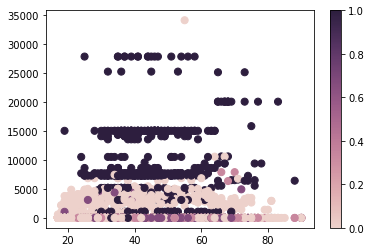

In [38]:
# If salary <=50K -> 0 else 1
import seaborn as sns
import matplotlib.pyplot as plt
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

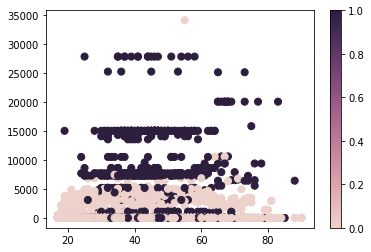

In [39]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

### Tune and Optimize kNN in Python Using scikit-learn

In [47]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 10)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 10)})

In [48]:
gridsearch.best_params_

{'n_neighbors': 9}

In [49]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
train_rmse

0.28928155299142067

In [50]:
test_rmse

0.3178880921043904